In [2]:
import argparse
import torch
import torch.nn.parallel

from models import modules, net, resnet, densenet, senet
import numpy as np
import loaddata_demo as loaddata
import pdb

def define_model(is_resnet, is_densenet, is_senet):
    if is_resnet:
        original_model = resnet.resnet50(pretrained = True)
        Encoder = modules.E_resnet(original_model) 
        model = net.model(Encoder, num_features=2048, block_channel = [256, 512, 1024, 2048])
    if is_densenet:
        original_model = densenet.densenet161(pretrained=True)
        Encoder = modules.E_densenet(original_model)
        model = net.model(Encoder, num_features=2208, block_channel = [192, 384, 1056, 2208])
    if is_senet:
        original_model = senet.senet154(pretrained='imagenet')
        Encoder = modules.E_senet(original_model)
        model = net.model(Encoder, num_features=2048, block_channel = [256, 512, 1024, 2048])

    return model

In [2]:
import matplotlib.image
import matplotlib.pyplot as plt
plt.set_cmap("jet")


In [23]:
# for i, image in enumerate(nyu2_loader):
#     image = torch.autograd.Variable(image, volatile=True).cuda()
#     out = model(image)

#     matplotlib.image.imsave('data/demo/out.png', out.view(out.size(2),out.size(3)).data.cpu().numpy())


/home/taher/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  # Remove the CWD from sys.path while we load stuff.


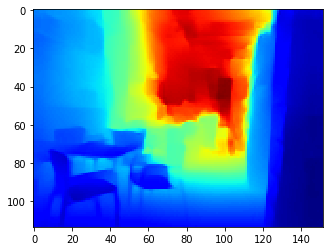

In [34]:
model = define_model(is_resnet=False, is_densenet=False, is_senet=True)
# model = torch.nn.DataParallel(model).cuda()
model = model.cuda()
model.load_state_dict(torch.load('./final_model.pth'))
model.eval()

nyu2_loader = loaddata.readNyu2('data/demo/2.png')
image = list(nyu2_loader)[0]

image = torch.autograd.Variable(image, volatile=True).cuda()
out = model(image)

# matplotlib.image.imsave('data/demo/out.png', out.view(out.size(2),out.size(3)).data.cpu().numpy())

plt.imshow(out.view(out.size(2),out.size(3)).data.cpu().numpy())
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import cv2
capture = cv2.VideoCapture(0)

ret, frame = capture.read()
# plt.imshow(frame)
# plt.show()
print(frame)

In [ ]:
cv2.imshow('video', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()